Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 117)               13806     
                                                                 
 dense_27 (Dense)            (None, 2)                 236       
                                                                 
Total params: 14,042
Trainable params: 14,042
Non-trainable params: 0
_________________________________________________________________
85/85 [==============================] - 0s 1ms/step - loss: 0.1039 - accuracy: 0.9719
Neural network accuracy: 97.19%
85/85 [==============================] - 0s 1ms/step


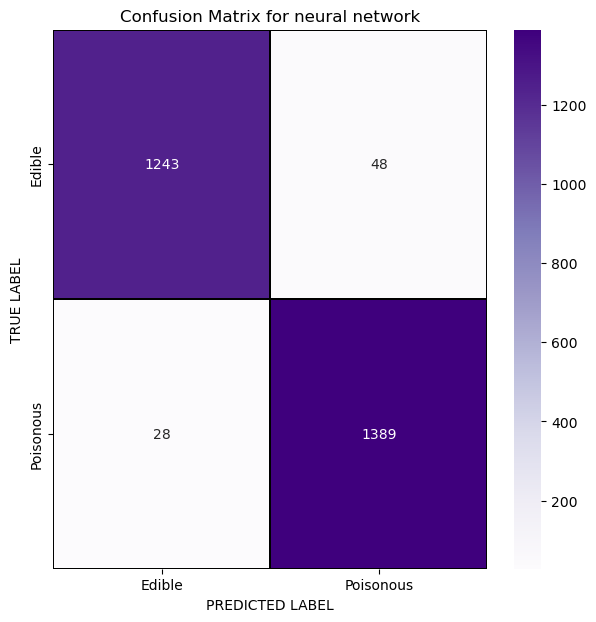

In [14]:
import numpy as np
import pandas as pa
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import *
from keras.utils import *
import warnings
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#-----------------------------------------import and encoding of data so it can be used in randomForest Model-------------------------------------

#dataset import
colnames=['e/p','cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color','ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'] 
dataset = pa.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", names=colnames, header=0)

#oneHOtEncoding
labels = colnames
categorical_data = dataset[labels]
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(categorical_data).toarray()
ohe_labels = ohe.get_feature_names_out(labels)
features = pa.DataFrame(feature_arr,columns=ohe_labels)

#print(features)

x= features.iloc[:, -117:].values
Y=features.iloc[:, :-117].values

#-------------------------------------------------implementation of ANN model------------------------------------------------

x_train,x_test, Y_train,Y_test = train_test_split(x, Y, test_size=1/3)

num_classes = Y_train.shape[1]
#print(num_classes)


def neural_network():
    model = Sequential()
    model.add(Dense(117, input_dim=117, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

param_grid= {'n_estimators':[100,200,300,400,500,600,700,800,900,1000],
    'criterion':['gini','entropy'],
    'max_depth': [2,3,4,5,6,7,8,20,100]}

model = neural_network()
grid_search = GridSearchCV(model, param_grid=param_grid, cv=10, scoring='f1_macro', n_jobs=4)
model.summary()

warnings.filterwarnings("ignore")

model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=1, batch_size=100)

#---------------------------------test and values of errors of model---------------------------------------------------------------------------------

scores = model.evaluate(x_test, Y_test)
print("Neural network accuracy: %.2f%%" % (scores[1]*100))

y_pred= model.predict(x_test)


#confusion matrix:
y_pred = (y_pred > 0.5) 
cm = confusion_matrix(Y_test[:,0], y_pred[:,0])
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for neural network');

plt.show()
plt.close()

